### Convolutional Neural Network
#### Building Small **Convolutional Neural Networks (ConvNets)** to classify MNIST Dataset
- Keras provides 2 kind of API 1. Functional API 2. Sequential API
- Sequential API is used when we have stack of layers like Input layer then Conv2D then pooling then Conv2D, pooling so on.
- If from any layer a branch comes out to give other detail rather than classification like where the object is, then we use Functional API

- Kernel Size is taken to tuple of odd integers like (1,1) or (3,3) or (5,5) ..
- 32 in first layer denotes 32 filters on size 3x3
- 


In [1]:
from keras.layers import *
from keras.models import Sequential
from tensorflow import keras
from keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix.

In [9]:
# Build Model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [10]:
(X_train,Y_train), (X_test, Y_test) =  keras.datasets.mnist.load_data()

In [11]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255
    Y = to_categorical(Y)
    return X,Y
Xtrain,Ytrain = preprocess_data(X_train,Y_train)
print(Xtrain.shape, Ytrain.shape)

Xtest, Ytest = preprocess_data(X_test, Y_test)
print(Xtest.shape, Ytest.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [12]:
Ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- categorical_crossentropy : for multiclass
- Binary Cross entropy : for binary class

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(Xtrain, Ytrain, epochs = 10, validation_split = 0.1, batch_size = 128)

Epoch 1/10
422/422 [==============================] - 32s 75ms/step - loss: 0.1739 - accuracy: 0.9471 - val_loss: 0.0665 - val_accuracy: 0.9808
Epoch 2/10
422/422 [==============================] - 30s 72ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 3/10
422/422 [==============================] - 31s 72ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0448 - val_accuracy: 0.9872
Epoch 4/10
422/422 [==============================] - 30s 72ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 32s 77ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0374 - val_accuracy: 0.9893
Epoch 6/10
422/422 [==============================] - 32s 76ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0365 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 32s 76ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0405 - val_accuracy:

In [15]:
model.evaluate(Xtest, Ytest)

313/313 [==============================] - 2s 8ms/step - loss: 0.0303 - accuracy: 0.9916


[0.030349355190992355, 0.991599977016449]

### use validation split (valsplit) to find correct number of epochs needed so that it does not overfit
#### after which accuracy rate decreases.

#### nexttime train your model without any validation split

In [16]:
type(hist)

tensorflow.python.keras.callbacks.History

In [26]:
model.loss

'categorical_crossentropy'

In [69]:
import matplotlib.pyplot as plt

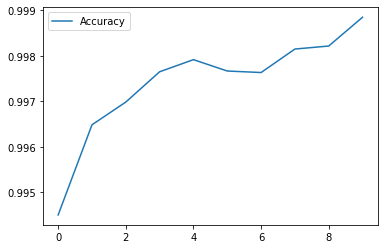

In [70]:
#plt.plot(hist.history['val_loss'], label = 'Loss')
plt.plot(hist.history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

### Data Augmentation [Refer Data Augmentation.ipynb]
- Deep Learning Models are "Data Hungry"
- Small Datasets lead to overfitting most of the times
- So lets generate more data by augmentation the training samples